In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
sns.set()

In [2]:
df=pd.read_excel("OMIS 4000 Final Project Data(1).xlsx")
df['Week_Number'] = df['Date'].dt.isocalendar().week
df.head()

,Date,Physician ID,Average Patient Age,Female Patients (%),Average Patient ESI,Average Patient LOS (minutes),Average Lab Order Count,Average Radiology Order Count,Average CT Order Count,72-hr Rate of Return,Shift,Day,Month,Year,ED Volume,Physician Speed (LOS in minutes),Physician Quality (72-hour return rate),Week_Number
0,2014-01-01,12,53.666667,33.333333,3.333333,241.666667,5.666667,0.666667,0.333333,0.0,3,4,1,2014,11,250.647910,0.032562,1
1,2014-01-01,1,55.400000,50.000000,2.900000,215.700000,7.300000,0.600000,0.300000,0.0,1,4,1,2014,166,234.370927,0.042112,1
2,2014-01-01,25,58.444444,44.444444,3.000000,196.111111,3.222222,0.888889,0.222222,0.0,1,4,1,2014,164,200.699158,0.040104,1
3,2014-01-01,17,64.181818,63.636364,3.090909,215.272727,15.818182,1.090909,0.181818,0.0,1,4,1,2014,214,249.263568,0.047249,1
4,2014-01-01,23,70.875000,50.000000,2.875000,214.625000,8.375000,0.750000,0.250000,0.0,1,4,1,2014,164,256.457011,0.026012,1


In [3]:
df_monday_morn = df[(df["Day"]==2) & (df["Shift"]==1)]
df_monday_aft = df[(df["Day"]==2) & (df["Shift"]==2)]
df_monday_night = df[(df["Day"]==2) & (df["Shift"]==3)]

df_tuesday_morn = df[(df["Day"]==3) & (df["Shift"]==1)]
df_tuesday_aft = df[(df["Day"]==3) & (df["Shift"]==2)]
df_tuesday_night = df[(df["Day"]==3) & (df["Shift"]==3)]

df_wednesday_morn = df[(df["Day"]==4) & (df["Shift"]==1)]
df_wednesday_aft = df[(df["Day"]==4) & (df["Shift"]==2)]
df_wednesday_night = df[(df["Day"]==4) & (df["Shift"]==3)]


In [4]:
ed_volume_by_week_and_year = df_monday_morn.groupby(['Year', 'Week_Number'])['ED Volume'].sum()
Monday_morning_EDS = list(ed_volume_by_week_and_year.values)
ed_volume_by_week_and_year = df_monday_aft.groupby(['Year', 'Week_Number'])['ED Volume'].sum()
Monday_afternoon_EDS = list(ed_volume_by_week_and_year.values)
ed_volume_by_week_and_year = df_monday_night.groupby(['Year', 'Week_Number'])['ED Volume'].sum()
Monday_night_EDS = list(ed_volume_by_week_and_year.values)

ed_volume_by_week_and_year = df_tuesday_morn.groupby(['Year', 'Week_Number'])['ED Volume'].sum()
Tuesday_morning_EDS = list(ed_volume_by_week_and_year.values)
ed_volume_by_week_and_year = df_tuesday_aft.groupby(['Year', 'Week_Number'])['ED Volume'].sum()
Tuesday_afternoon_EDS = list(ed_volume_by_week_and_year.values)
ed_volume_by_week_and_year = df_tuesday_night.groupby(['Year', 'Week_Number'])['ED Volume'].sum()
Tuesday_night_EDS = list(ed_volume_by_week_and_year.values)

ed_volume_by_week_and_year = df_wednesday_morn.groupby(['Year', 'Week_Number'])['ED Volume'].sum()
Wednesday_morning_EDS = list(ed_volume_by_week_and_year.values)
ed_volume_by_week_and_year = df_wednesday_aft.groupby(['Year', 'Week_Number'])['ED Volume'].sum()
Wednesday_afternoon_EDS = list(ed_volume_by_week_and_year.values)
ed_volume_by_week_and_year = df_wednesday_night.groupby(['Year', 'Week_Number'])['ED Volume'].sum()
Wednesday_night_EDS = list(ed_volume_by_week_and_year.values)


In [5]:
column_name = 'ED Volume'

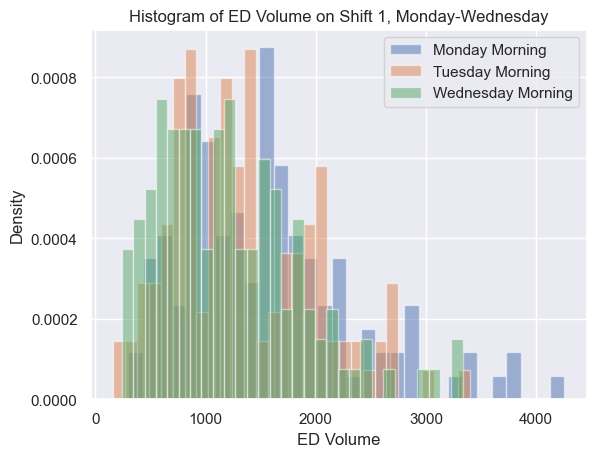

In [6]:
# Plot the histograms with transparency (alpha) and labels
plt.hist(Monday_morning_EDS, alpha=0.5, label='Monday Morning', density=True, bins=30)
plt.hist(Tuesday_morning_EDS, alpha=0.5, label='Tuesday Morning', density=True, bins=30)
plt.hist(Wednesday_morning_EDS, alpha=0.5, label='Wednesday Morning', density=True, bins=30)

# Customize the plot
plt.title('Histogram of ED Volume on Shift 1, Monday-Wednesday')
plt.xlabel('ED Volume')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

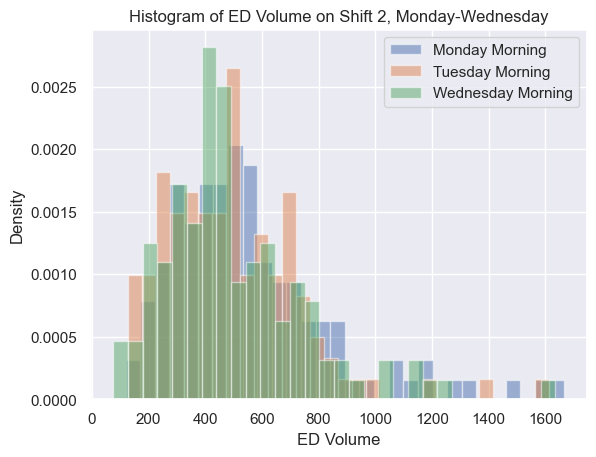

In [7]:
# Plot the histograms with transparency (alpha) and labels
plt.hist(Monday_afternoon_EDS, alpha=0.5, label='Monday Morning', density=True, bins=30)
plt.hist(Tuesday_afternoon_EDS, alpha=0.5, label='Tuesday Morning', density=True, bins=30)
plt.hist(Wednesday_afternoon_EDS, alpha=0.5, label='Wednesday Morning', density=True, bins=30)

# Customize the plot
plt.title('Histogram of ED Volume on Shift 2, Monday-Wednesday')
plt.xlabel('ED Volume')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

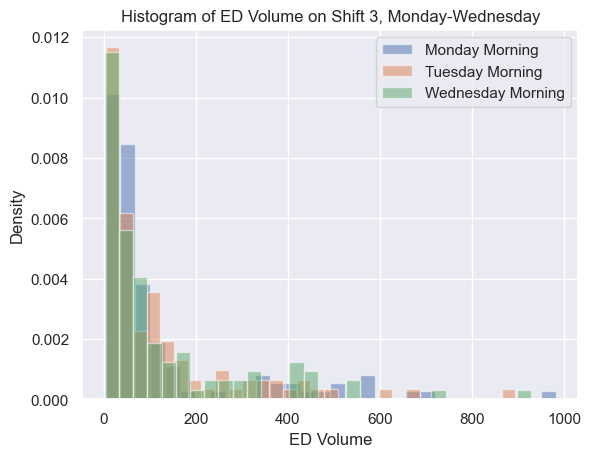

In [8]:
# Plot the histograms with transparency (alpha) and labels
plt.hist(Monday_night_EDS, alpha=0.5, label='Monday Morning', density=True, bins=30)
plt.hist(Tuesday_night_EDS, alpha=0.5, label='Tuesday Morning', density=True, bins=30)
plt.hist(Wednesday_night_EDS, alpha=0.5, label='Wednesday Morning', density=True, bins=30)

# Customize the plot
plt.title('Histogram of ED Volume on Shift 3, Monday-Wednesday')
plt.xlabel('ED Volume')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

Monday Morning Fit

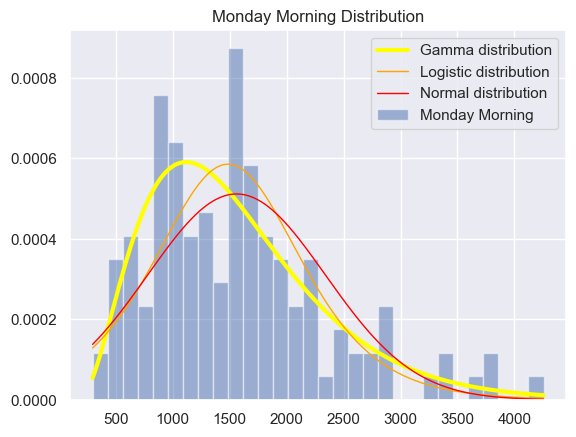

In [9]:
z = Monday_morning_EDS

lognorm_params = st.lognorm.fit(z)
gamma_params = st.gamma.fit(z)
expon_params = st.expon.fit(z)
logistic_params = st.logistic.fit(z)
norm_params = st.norm.fit(z)
weibull_params = st.exponweib.fit(z)

x = np.linspace(min(z), max(z), 1000)
lognorm_pdf = st.lognorm.pdf(x, *lognorm_params)
gamma_pdf = st.gamma.pdf(x, *gamma_params)
expon_pdf = st.expon.pdf(x, *expon_params)
logistic_pdf = st.logistic.pdf(x, *logistic_params)
norm_pdf = st.norm.pdf(x, *norm_params)
weibull_pdf = st.exponweib.pdf(x, *weibull_params)

# plt.plot(x, lognorm_pdf, 'blue', lw=3, label='Lognorm distribution')
plt.plot(x, gamma_pdf, 'yellow', lw=3, label='Gamma distribution')
# plt.plot(x, expon_pdf, 'green', lw=1, label='Exponential distribution')
plt.plot(x, logistic_pdf, 'orange', lw=1, label='Logistic distribution')
plt.plot(x, norm_pdf, 'red', lw=1, label='Normal distribution')
# plt.plot(x, weibull_pdf, 'purple', lw=1, label='Weibull distribution')
plt.hist(z, alpha=0.5, label='Monday Morning', density=True, bins=30)
plt.title('Monday Morning Distribution')
plt.legend()
plt.show()


Monday Afternoon Fit

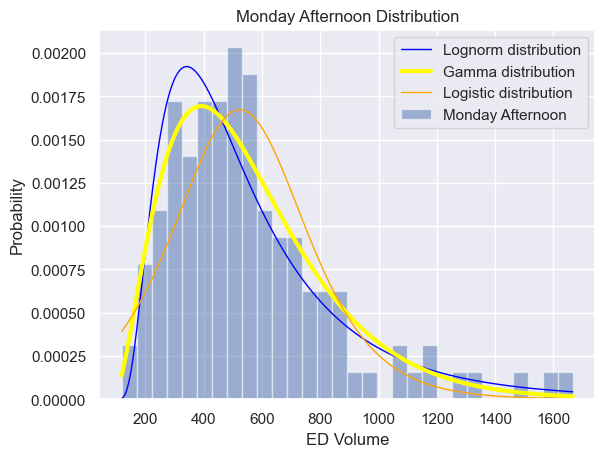

In [10]:
z = Monday_afternoon_EDS

lognorm_params = st.lognorm.fit(z)
gamma_params = st.gamma.fit(z)
expon_params = st.expon.fit(z)
logistic_params = st.logistic.fit(z)
norm_params = st.norm.fit(z)

x = np.linspace(min(z), max(z), 1000)
lognorm_pdf = st.lognorm.pdf(x, *lognorm_params)
gamma_pdf = st.gamma.pdf(x, *gamma_params)
expon_pdf = st.expon.pdf(x, *expon_params)
logistic_pdf = st.logistic.pdf(x, *logistic_params)
norm_pdf = st.norm.pdf(x, *norm_params)

plt.plot(x, lognorm_pdf, 'blue', lw=1, label='Lognorm distribution')
plt.plot(x, gamma_pdf, 'yellow', lw=3, label='Gamma distribution')
# plt.plot(x, expon_pdf, 'green', lw=1, label='Exponential distribution')
plt.plot(x, logistic_pdf, 'orange', lw=1, label='Logistic distribution')
# plt.plot(x, norm_pdf, 'red', lw=1, label='Normal distribution')
plt.hist(z, alpha=0.5, label='Monday Afternoon', density=True, bins=30)
plt.title('Monday Afternoon Distribution')
plt.xlabel('ED Volume')
plt.ylabel('Probability')
plt.legend()
plt.show()


Monday Night Fit

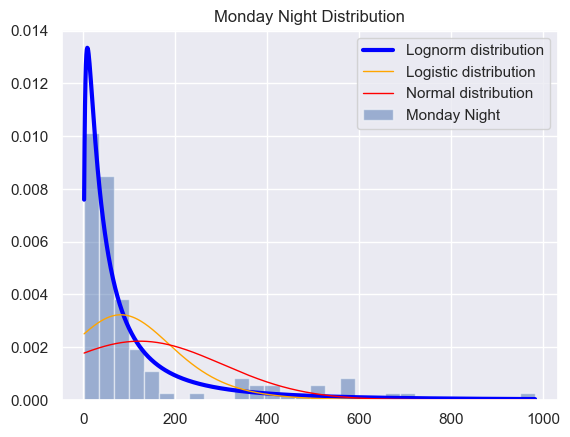

In [11]:
z = Monday_night_EDS

lognorm_params = st.lognorm.fit(z)
gamma_params = st.gamma.fit(z)
expon_params = st.expon.fit(z)
logistic_params = st.logistic.fit(z)
norm_params = st.norm.fit(z)

x = np.linspace(min(z), max(z), 1000)
lognorm_pdf = st.lognorm.pdf(x, *lognorm_params)
gamma_pdf = st.gamma.pdf(x, *gamma_params)
expon_pdf = st.expon.pdf(x, *expon_params)
logistic_pdf = st.logistic.pdf(x, *logistic_params)
norm_pdf = st.norm.pdf(x, *norm_params)

plt.plot(x, lognorm_pdf, 'blue', lw=3, label='Lognorm distribution')
# plt.plot(x, gamma_pdf, 'yellow', lw=3, label='Gamma distribution')
# plt.plot(x, expon_pdf, 'green', lw=1, label='Exponential distribution')
plt.plot(x, logistic_pdf, 'orange', lw=1, label='Logistic distribution')
plt.plot(x, norm_pdf, 'red', lw=1, label='Normal distribution')
plt.hist(z, alpha=0.5, label='Monday Night', density=True, bins=30)
plt.title('Monday Night Distribution')
plt.legend()
plt.show()


Tuesday Morning Fit

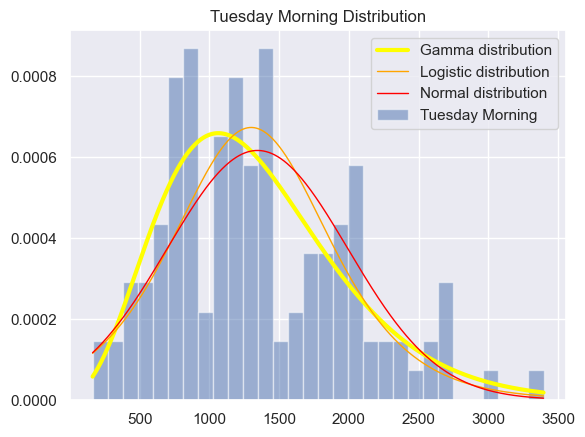

In [12]:
z = Tuesday_morning_EDS

lognorm_params = st.lognorm.fit(z)
gamma_params = st.gamma.fit(z)
expon_params = st.expon.fit(z)
logistic_params = st.logistic.fit(z)
norm_params = st.norm.fit(z)

x = np.linspace(min(z), max(z), 1000)
lognorm_pdf = st.lognorm.pdf(x, *lognorm_params)
gamma_pdf = st.gamma.pdf(x, *gamma_params)
expon_pdf = st.expon.pdf(x, *expon_params)
logistic_pdf = st.logistic.pdf(x, *logistic_params)
norm_pdf = st.norm.pdf(x, *norm_params)

# plt.plot(x, lognorm_pdf, 'blue', lw=3, label='Lognorm distribution')
plt.plot(x, gamma_pdf, 'yellow', lw=3, label='Gamma distribution')
# plt.plot(x, expon_pdf, 'green', lw=1, label='Exponential distribution')
plt.plot(x, logistic_pdf, 'orange', lw=1, label='Logistic distribution')
plt.plot(x, norm_pdf, 'red', lw=1, label='Normal distribution')
plt.hist(z, alpha=0.5, label='Tuesday Morning', density=True, bins=30)
plt.title('Tuesday Morning Distribution')
plt.legend()
plt.show()


Tuesday Afternoon Fit

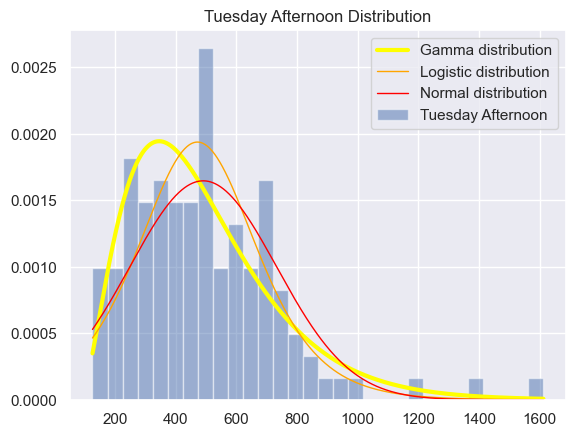

In [13]:
z = Tuesday_afternoon_EDS

lognorm_params = st.lognorm.fit(z)
gamma_params = st.gamma.fit(z)
expon_params = st.expon.fit(z)
logistic_params = st.logistic.fit(z)
norm_params = st.norm.fit(z)

x = np.linspace(min(z), max(z), 1000)
lognorm_pdf = st.lognorm.pdf(x, *lognorm_params)
gamma_pdf = st.gamma.pdf(x, *gamma_params)
expon_pdf = st.expon.pdf(x, *expon_params)
logistic_pdf = st.logistic.pdf(x, *logistic_params)
norm_pdf = st.norm.pdf(x, *norm_params)

# plt.plot(x, lognorm_pdf, 'blue', lw=3, label='Lognorm distribution')
plt.plot(x, gamma_pdf, 'yellow', lw=3, label='Gamma distribution')
# plt.plot(x, expon_pdf, 'green', lw=1, label='Exponential distribution')
plt.plot(x, logistic_pdf, 'orange', lw=1, label='Logistic distribution')
plt.plot(x, norm_pdf, 'red', lw=1, label='Normal distribution')
plt.hist(z, alpha=0.5, label='Tuesday Afternoon', density=True, bins=30)
plt.title('Tuesday Afternoon Distribution')
plt.legend()
plt.show()


Tuesday Night Fit

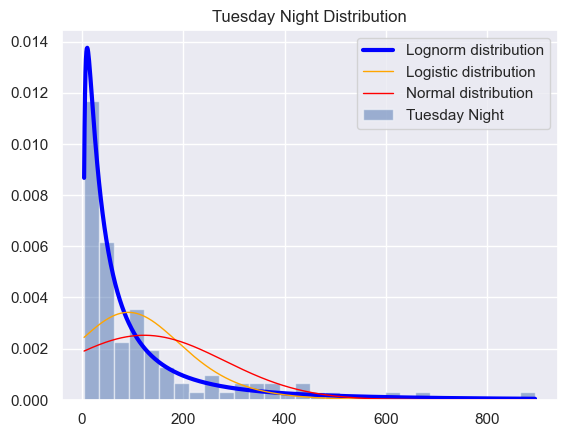

In [14]:
z = Tuesday_night_EDS

lognorm_params = st.lognorm.fit(z)
gamma_params = st.gamma.fit(z)
expon_params = st.expon.fit(z)
logistic_params = st.logistic.fit(z)
norm_params = st.norm.fit(z)

x = np.linspace(min(z), max(z), 1000)
lognorm_pdf = st.lognorm.pdf(x, *lognorm_params)
gamma_pdf = st.gamma.pdf(x, *gamma_params)
expon_pdf = st.expon.pdf(x, *expon_params)
logistic_pdf = st.logistic.pdf(x, *logistic_params)
norm_pdf = st.norm.pdf(x, *norm_params)

plt.plot(x, lognorm_pdf, 'blue', lw=3, label='Lognorm distribution')
# plt.plot(x, gamma_pdf, 'yellow', lw=3, label='Gamma distribution')
# plt.plot(x, expon_pdf, 'green', lw=1, label='Exponential distribution')
plt.plot(x, logistic_pdf, 'orange', lw=1, label='Logistic distribution')
plt.plot(x, norm_pdf, 'red', lw=1, label='Normal distribution')
plt.hist(z, alpha=0.5, label='Tuesday Night', density=True, bins=30)
plt.title('Tuesday Night Distribution')
plt.legend()
plt.show()


Wednesday Morning Fit

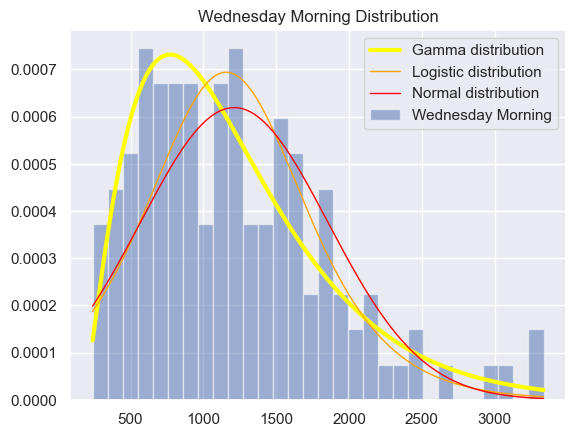

In [15]:
z = Wednesday_morning_EDS

lognorm_params = st.lognorm.fit(z)
gamma_params = st.gamma.fit(z)
expon_params = st.expon.fit(z)
logistic_params = st.logistic.fit(z)
norm_params = st.norm.fit(z)

x = np.linspace(min(z), max(z), 1000)
lognorm_pdf = st.lognorm.pdf(x, *lognorm_params)
gamma_pdf = st.gamma.pdf(x, *gamma_params)
expon_pdf = st.expon.pdf(x, *expon_params)
logistic_pdf = st.logistic.pdf(x, *logistic_params)
norm_pdf = st.norm.pdf(x, *norm_params)

# plt.plot(x, lognorm_pdf, 'blue', lw=3, label='Lognorm distribution')
plt.plot(x, gamma_pdf, 'yellow', lw=3, label='Gamma distribution')
# plt.plot(x, expon_pdf, 'green', lw=1, label='Exponential distribution')
plt.plot(x, logistic_pdf, 'orange', lw=1, label='Logistic distribution')
plt.plot(x, norm_pdf, 'red', lw=1, label='Normal distribution')
plt.hist(z, alpha=0.5, label='Wednesday Morning', density=True, bins=30)
plt.title('Wednesday Morning Distribution')
plt.legend()
plt.show()


Wednesday Afternoon Fit

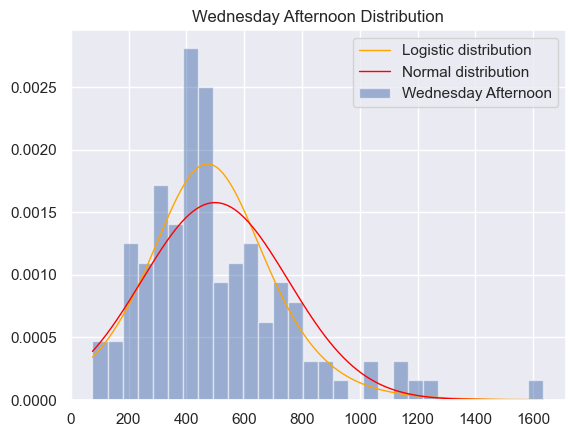

In [16]:
z = Wednesday_afternoon_EDS

lognorm_params = st.lognorm.fit(z)
gamma_params = st.gamma.fit(z)
expon_params = st.expon.fit(z)
logistic_params = st.logistic.fit(z)
norm_params = st.norm.fit(z)

x = np.linspace(min(z), max(z), 1000)
lognorm_pdf = st.lognorm.pdf(x, *lognorm_params)
gamma_pdf = st.gamma.pdf(x, *gamma_params)
expon_pdf = st.expon.pdf(x, *expon_params)
logistic_pdf = st.logistic.pdf(x, *logistic_params)
norm_pdf = st.norm.pdf(x, *norm_params)

# plt.plot(x, lognorm_pdf, 'blue', lw=3, label='Lognorm distribution')
# plt.plot(x, gamma_pdf, 'yellow', lw=3, label='Gamma distribution')
# plt.plot(x, expon_pdf, 'green', lw=1, label='Exponential distribution')
plt.plot(x, logistic_pdf, 'orange', lw=1, label='Logistic distribution')
plt.plot(x, norm_pdf, 'red', lw=1, label='Normal distribution')
plt.hist(z, alpha=0.5, label='Wednesday Afternoon', density=True, bins=30)
plt.title('Wednesday Afternoon Distribution')
plt.legend()
plt.show()


Wednesday Night Fit

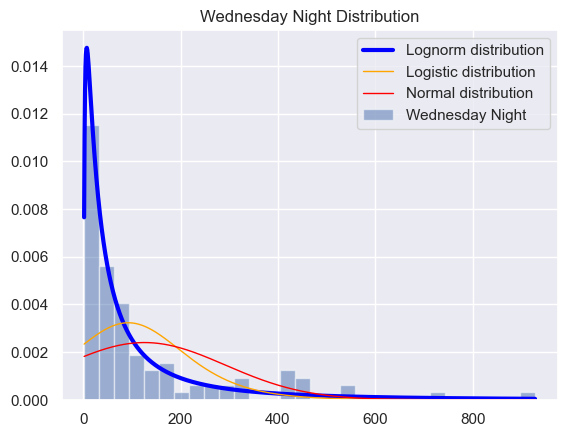

In [17]:
z = Wednesday_night_EDS

lognorm_params = st.lognorm.fit(z)
gamma_params = st.gamma.fit(z)
expon_params = st.expon.fit(z)
logistic_params = st.logistic.fit(z)
norm_params = st.norm.fit(z)

x = np.linspace(min(z), max(z), 1000)
lognorm_pdf = st.lognorm.pdf(x, *lognorm_params)
gamma_pdf = st.gamma.pdf(x, *gamma_params)
expon_pdf = st.expon.pdf(x, *expon_params)
logistic_pdf = st.logistic.pdf(x, *logistic_params)
norm_pdf = st.norm.pdf(x, *norm_params)

plt.plot(x, lognorm_pdf, 'blue', lw=3, label='Lognorm distribution')
# plt.plot(x, gamma_pdf, 'yellow', lw=3, label='Gamma distribution')
# plt.plot(x, expon_pdf, 'green', lw=1, label='Exponential distribution')
plt.plot(x, logistic_pdf, 'orange', lw=1, label='Logistic distribution')
plt.plot(x, norm_pdf, 'red', lw=1, label='Normal distribution')
plt.hist(z, alpha=0.5, label='Wednesday Night', density=True, bins=30)
plt.title('Wednesday Night Distribution')
plt.legend()
plt.show()


Tunable Parameter

In [18]:
percentile=0.90

In [19]:
EX_Vals = []

Monday Morning Params

In [20]:
z = Monday_morning_EDS

shape, loc, scale = st.gamma.fit(z)

value = st.gamma.ppf(percentile, shape, loc, scale)
EX_Vals.append(value)

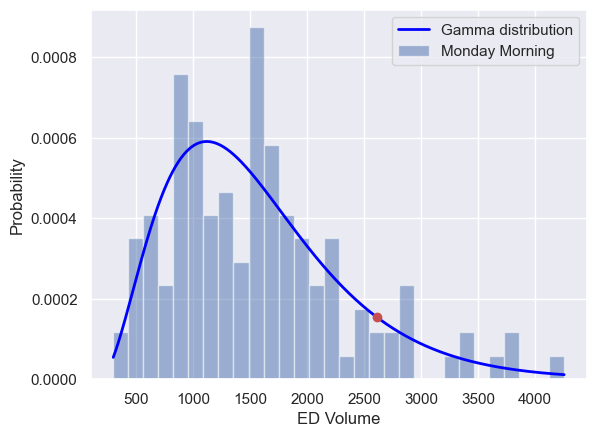

In [21]:
x = np.linspace(min(z), max(z), 1000)

gamma_pdf = st.gamma.pdf(x, shape, loc, scale)

plt.plot(x, gamma_pdf, 'blue', lw=2, label='Gamma distribution')
plt.plot(value, st.gamma.pdf(value, shape, loc, scale), 'ro')
plt.hist(z, alpha=0.5, label='Monday Morning', density=True, bins=30)
plt.xlabel("ED Volume")
plt.ylabel("Probability")
plt.legend()
plt.show()

Tuesday Morning Params

In [22]:
z = Tuesday_morning_EDS

shape, loc, scale = st.gamma.fit(z)

value = st.gamma.ppf(percentile, shape, loc, scale)
EX_Vals.append(value)

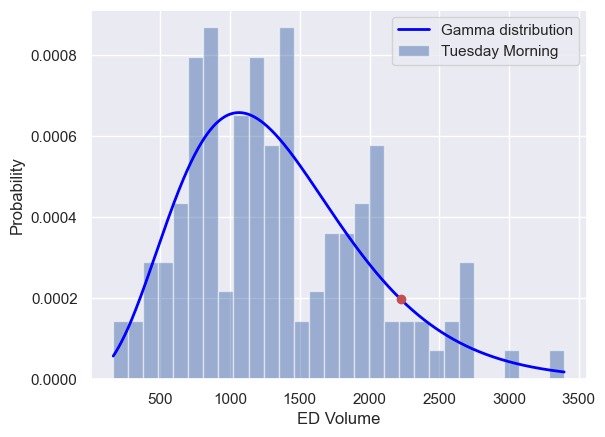

In [23]:
x = np.linspace(min(z), max(z), 1000)

gamma_pdf = st.gamma.pdf(x, shape, loc, scale)

plt.plot(x, gamma_pdf, 'blue', lw=2, label='Gamma distribution')
plt.plot(value, st.gamma.pdf(value, shape, loc, scale), 'ro')
plt.hist(z, alpha=0.5, label='Tuesday Morning', density=True, bins=30)
plt.xlabel("ED Volume")
plt.ylabel("Probability")
plt.legend()
plt.show()

Wendesday Morning Params

In [24]:
z = Wednesday_morning_EDS

shape, loc, scale = st.gamma.fit(z)

value = st.gamma.ppf(percentile, shape, loc, scale)
EX_Vals.append(value)

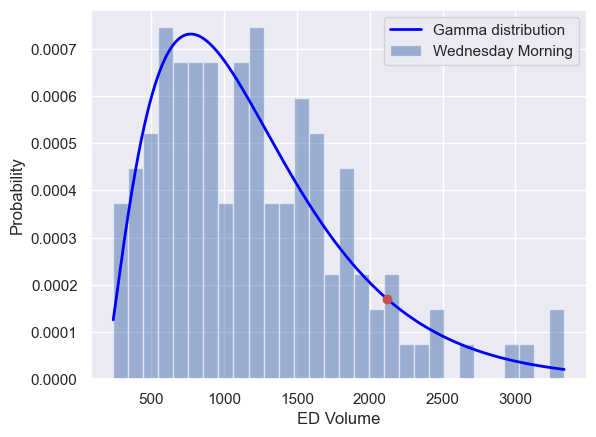

In [25]:
x = np.linspace(min(z), max(z), 1000)

gamma_pdf = st.gamma.pdf(x, shape, loc, scale)

plt.plot(x, gamma_pdf, 'blue', lw=2, label='Gamma distribution')
plt.plot(value, st.gamma.pdf(value, shape, loc, scale), 'ro')
plt.hist(z, alpha=0.5, label='Wednesday Morning', density=True, bins=30)
plt.xlabel("ED Volume")
plt.ylabel("Probability")
plt.legend()
plt.show()

Monday Afternoon Params

In [26]:
z = Monday_afternoon_EDS

shape, loc, scale = st.gamma.fit(z)

value = st.gamma.ppf(percentile, shape, loc, scale)
EX_Vals.append(value)

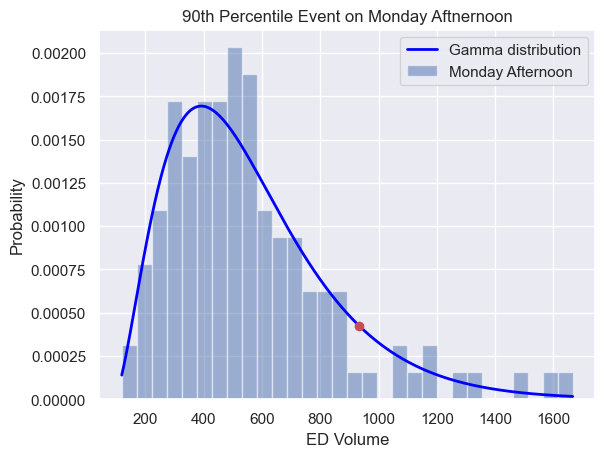

In [27]:
x = np.linspace(min(z), max(z), 1000)

gamma_pdf = st.gamma.pdf(x, shape, loc, scale)

plt.plot(x, gamma_pdf, 'blue', lw=2, label='Gamma distribution')
plt.plot(value, st.gamma.pdf(value, shape, loc, scale), 'ro')
plt.hist(z, alpha=0.5, label='Monday Afternoon', density=True, bins=30)
plt.xlabel("ED Volume")
plt.ylabel("Probability")
plt.title('90th Percentile Event on Monday Aftnernoon')
plt.legend()
plt.show()

Tuesday Afternoon Params

In [28]:
z = Tuesday_afternoon_EDS

shape, loc, scale = st.gamma.fit(z)

value = st.gamma.ppf(percentile, shape, loc, scale)
EX_Vals.append(value)

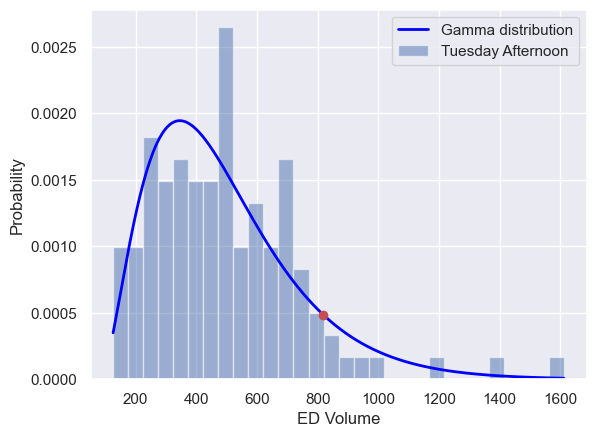

In [29]:
x = np.linspace(min(z), max(z), 1000)

gamma_pdf = st.gamma.pdf(x, shape, loc, scale)

plt.plot(x, gamma_pdf, 'blue', lw=2, label='Gamma distribution')
plt.plot(value, st.gamma.pdf(value, shape, loc, scale), 'ro')
plt.hist(z, alpha=0.5, label='Tuesday Afternoon', density=True, bins=30)
plt.xlabel('ED Volume')
plt.ylabel('Probability')
plt.legend()
plt.show()

Wednesday Afternoon Params

In [30]:
z = Wednesday_afternoon_EDS

loc, scale = st.logistic.fit(z)

value = st.logistic.ppf(percentile, loc, scale)
EX_Vals.append(value)

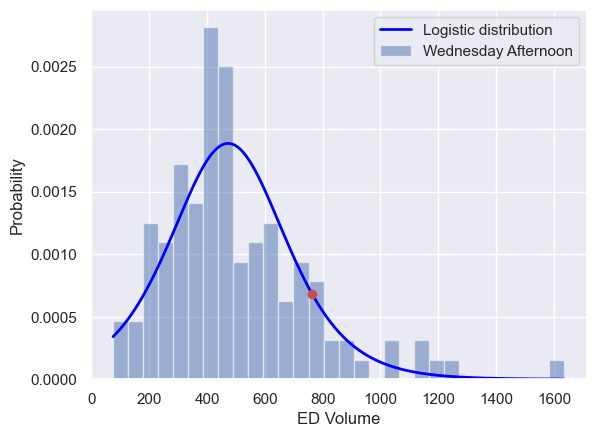

In [31]:
x = np.linspace(min(z), max(z), 1000)

logistic_pdf = st.logistic.pdf(x, loc, scale)

plt.plot(x, logistic_pdf, 'blue', lw=2, label='Logistic distribution')
plt.plot(value, st.logistic.pdf(value, loc, scale), 'ro')
plt.hist(z, alpha=0.5, label='Wednesday Afternoon', density=True, bins=30)
plt.xlabel("ED Volume")
plt.ylabel("Probability")
plt.legend()
plt.show()

Monday Night Params

In [32]:
z = Monday_night_EDS

shape, loc, scale = st.lognorm.fit(z)

value = st.lognorm.ppf(percentile, shape, loc= loc, scale = scale)
EX_Vals.append(value)

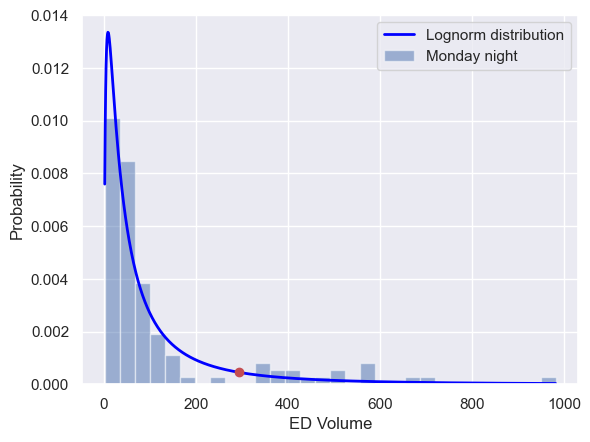

In [33]:
x = np.linspace(min(z), max(z), 1000)

lognorm_pdf = st.lognorm.pdf(x, shape, loc, scale)

plt.plot(x, lognorm_pdf, 'blue', lw=2, label='Lognorm distribution')
plt.plot(value, st.lognorm.pdf(value, shape, loc, scale), 'ro')
plt.hist(z, alpha=0.5, label='Monday night', density=True, bins=30)
plt.xlabel("ED Volume")
plt.ylabel("Probability")
plt.legend()
plt.show()

Tuesday Night Params

In [34]:
z = Tuesday_night_EDS

shape, loc, scale = st.lognorm.fit(z)

value = st.lognorm.ppf(percentile, shape, loc= loc, scale = scale)
EX_Vals.append(value)

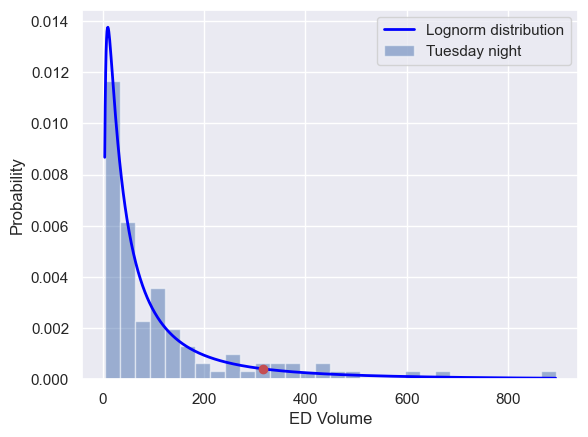

In [35]:
x = np.linspace(min(z), max(z), 1000)

lognorm_pdf = st.lognorm.pdf(x, shape, loc, scale)

plt.plot(x, lognorm_pdf, 'blue', lw=2, label='Lognorm distribution')
plt.plot(value, st.lognorm.pdf(value, shape, loc, scale), 'ro')
plt.hist(z, alpha=0.5, label='Tuesday night', density=True, bins=30)
plt.xlabel("ED Volume")
plt.ylabel("Probability")
plt.legend()
plt.show()

Wednesday Night Params

In [36]:
z = Wednesday_night_EDS

shape, loc, scale = st.lognorm.fit(z)

value = st.lognorm.ppf(percentile, shape, loc, scale)
EX_Vals.append(value)

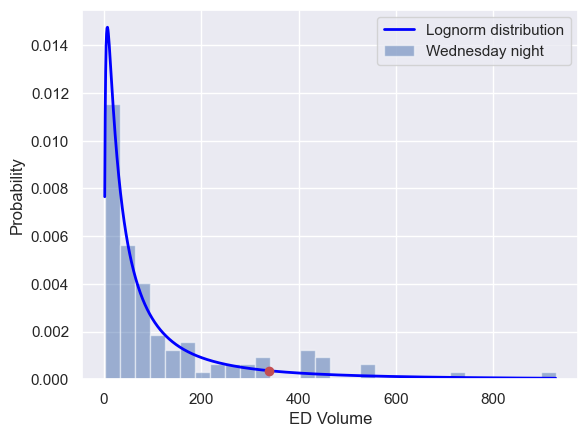

In [37]:
x = np.linspace(min(z), max(z), 1000)

lognorm_pdf = st.lognorm.pdf(x, shape, loc, scale)

plt.plot(x, lognorm_pdf, 'blue', lw=2, label='Lognorm distribution')
plt.plot(value, st.lognorm.pdf(value, shape, loc, scale), 'ro')
plt.hist(z, alpha=0.5, label='Wednesday night', density=True, bins=30)
plt.xlabel("ED Volume")
plt.ylabel("Probability")
plt.legend()
plt.show()

In [38]:
EX_Vals

[2615.0100304588204,
 2224.3150834052317,
 2116.8572771478744,
 933.7482651610213,
 817.945374108041,
 764.2008534653297,
 293.94786258404037,
 317.1954847371322,
 339.20551283922543]

In [39]:
EX_Vals_2D = [EX_Vals[0:3],EX_Vals[3:6],EX_Vals[6:]]
EX_Vals_2D

[[2615.0100304588204, 2224.3150834052317, 2116.8572771478744],
 [933.7482651610213, 817.945374108041, 764.2008534653297],
 [293.94786258404037, 317.1954847371322, 339.20551283922543]]

Question Answering

In [40]:
df.columns

Index(['Date', ' Physician ID', 'Average Patient Age', 'Female Patients (%)',
       'Average Patient ESI', 'Average Patient LOS (minutes)',
       'Average Lab Order Count', 'Average Radiology Order Count',
       'Average CT Order Count', '72-hr Rate of Return', 'Shift', 'Day',
       'Month', 'Year', 'ED Volume', 'Physician Speed (LOS in minutes)',
       'Physician Quality (72-hour return rate)', 'Week_Number'],
      dtype='object')

In [41]:
df.dtypes

Date                                       datetime64[ns]
 Physician ID                                       int64
Average Patient Age                               float64
Female Patients (%)                               float64
Average Patient ESI                               float64
Average Patient LOS (minutes)                     float64
Average Lab Order Count                           float64
Average Radiology Order Count                     float64
Average CT Order Count                            float64
72-hr Rate of Return                              float64
Shift                                               int64
Day                                                 int64
Month                                               int64
Year                                                int64
ED Volume                                           int64
Physician Speed (LOS in minutes)                  float64
Physician Quality (72-hour return rate)           float64
Week_Number   

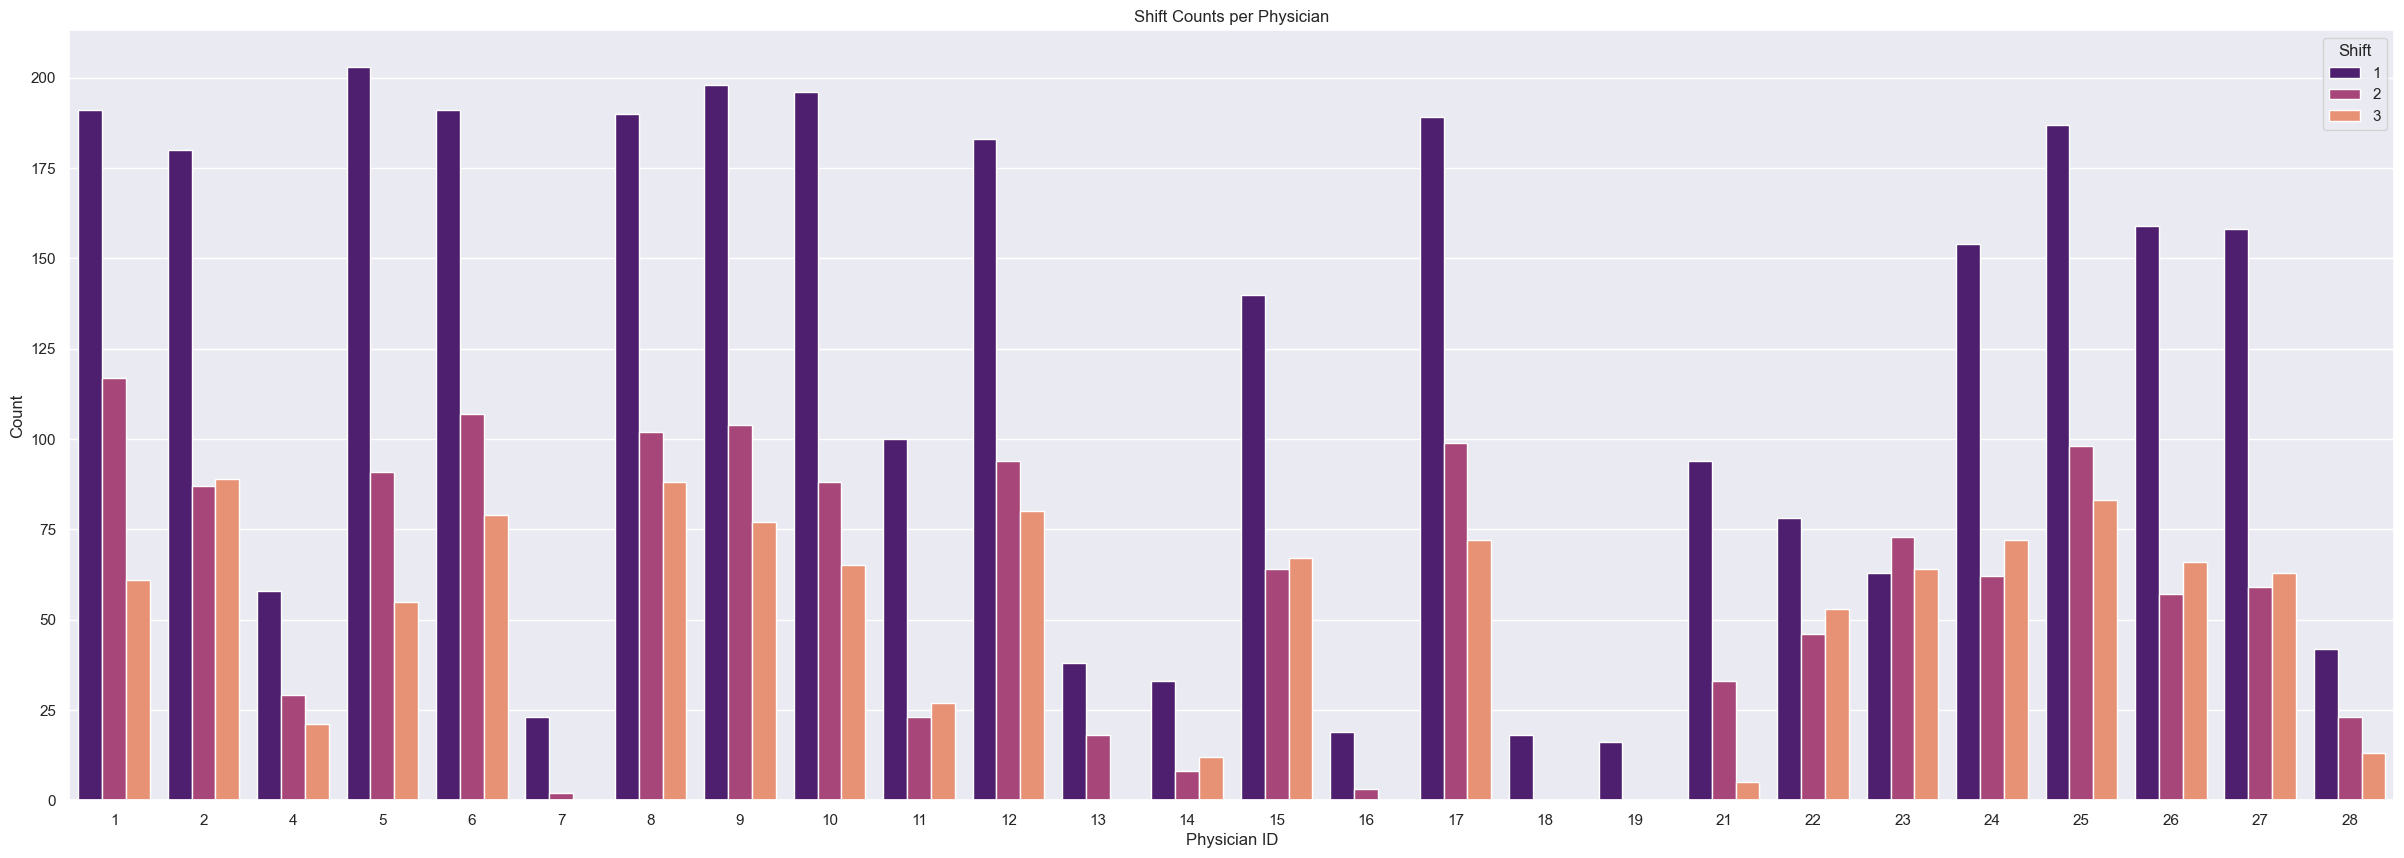

In [42]:
# Group by 'Physician ID' and 'Shift', then count the number of occurrences
shift_counts = df.groupby([' Physician ID', 'Shift']).size().reset_index(name='Count')

# Plot the bar graph using seaborn
plt.figure(figsize=(30,10))
sns.barplot(data=shift_counts, x=' Physician ID', y='Count', hue='Shift', palette="magma")
plt.title('Shift Counts per Physician')
plt.xlabel('Physician ID')
plt.ylabel('Count')
plt.legend(title='Shift', loc='upper right')
plt.show()

How many shifts worked by each pysician on days 2-4

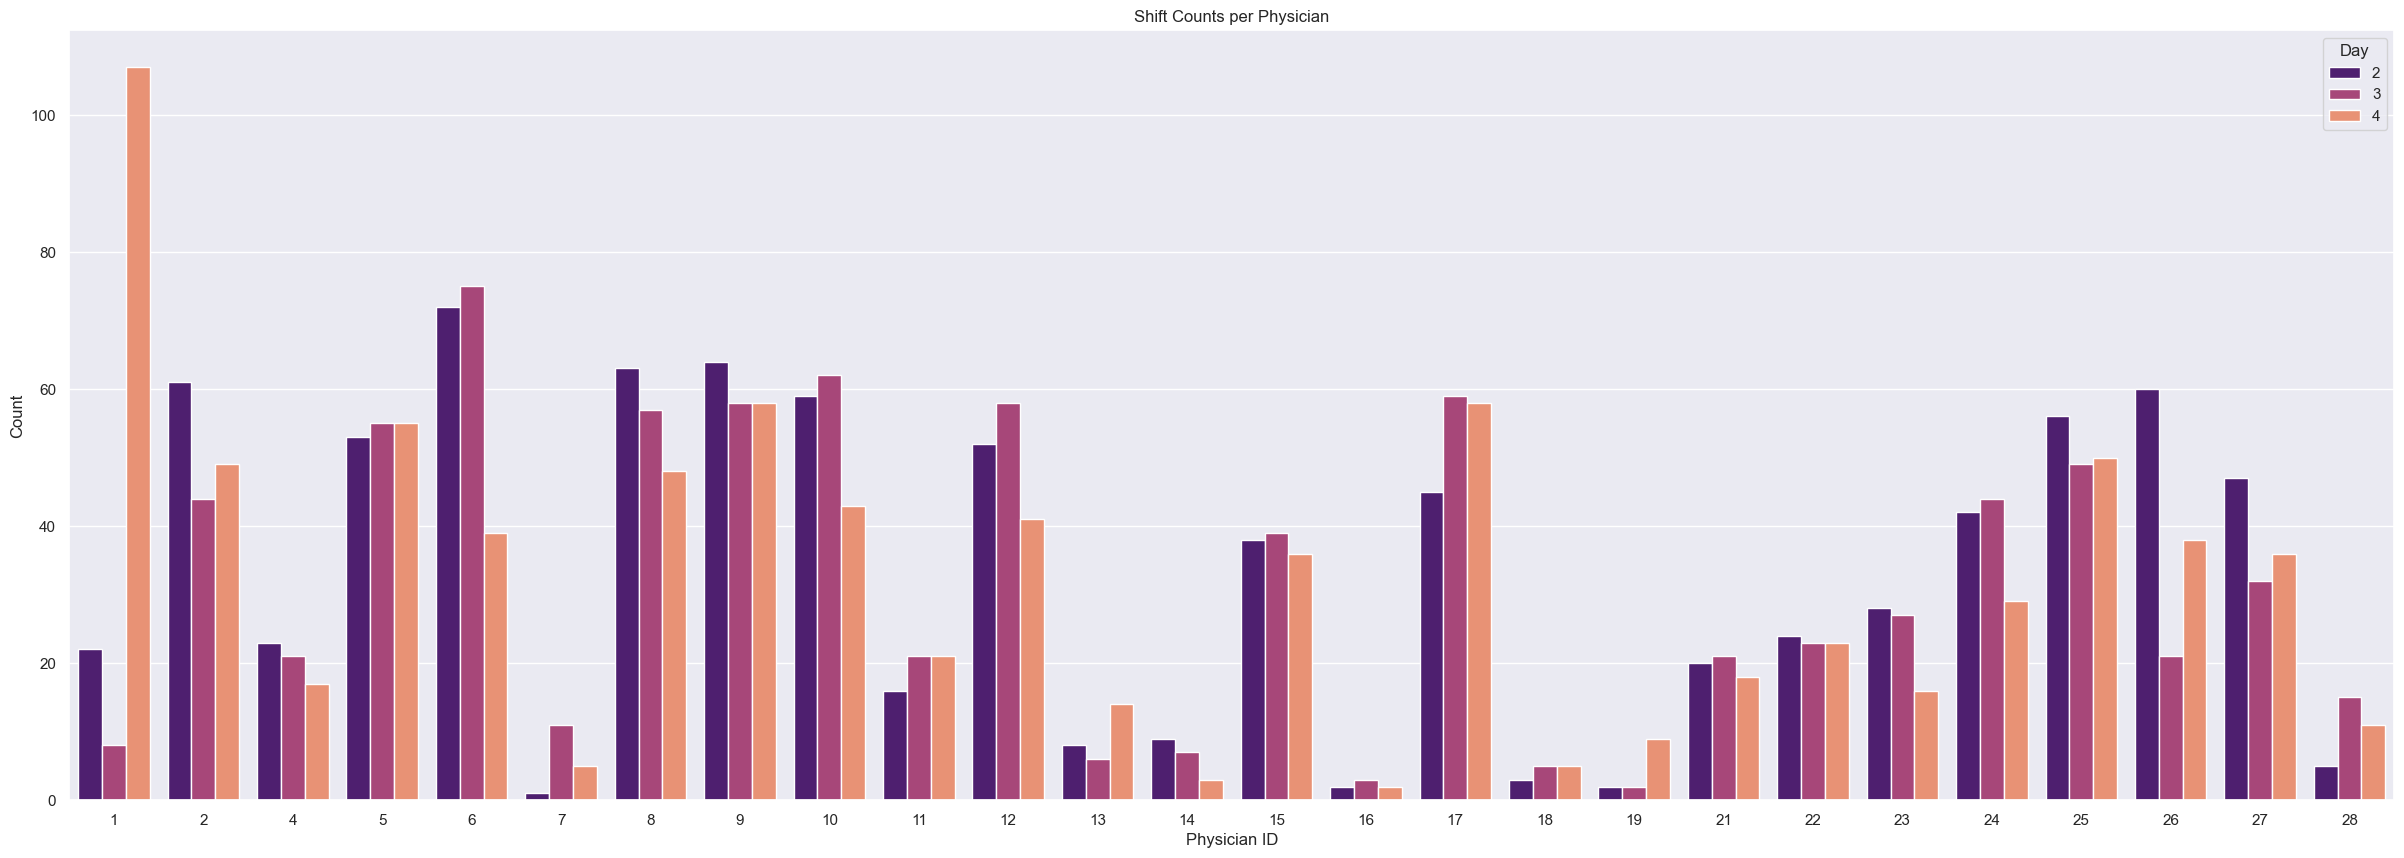

In [43]:
df_subset = df[(df["Day"]>=2) & (df["Day"]<=4)]
shift_counts = df_subset.groupby([' Physician ID', 'Day']).size().reset_index(name='Count')

# Plot the bar graph using seaborn
plt.figure(figsize=(30,10))
sns.barplot(data=shift_counts, x=' Physician ID', y='Count', hue='Day', palette="magma")
plt.title('Shift Counts per Physician')
plt.xlabel('Physician ID')
plt.ylabel('Count')
plt.legend(title='Day', loc='upper right')
plt.show()

How many shifts worked by each Physician in the past 6 months

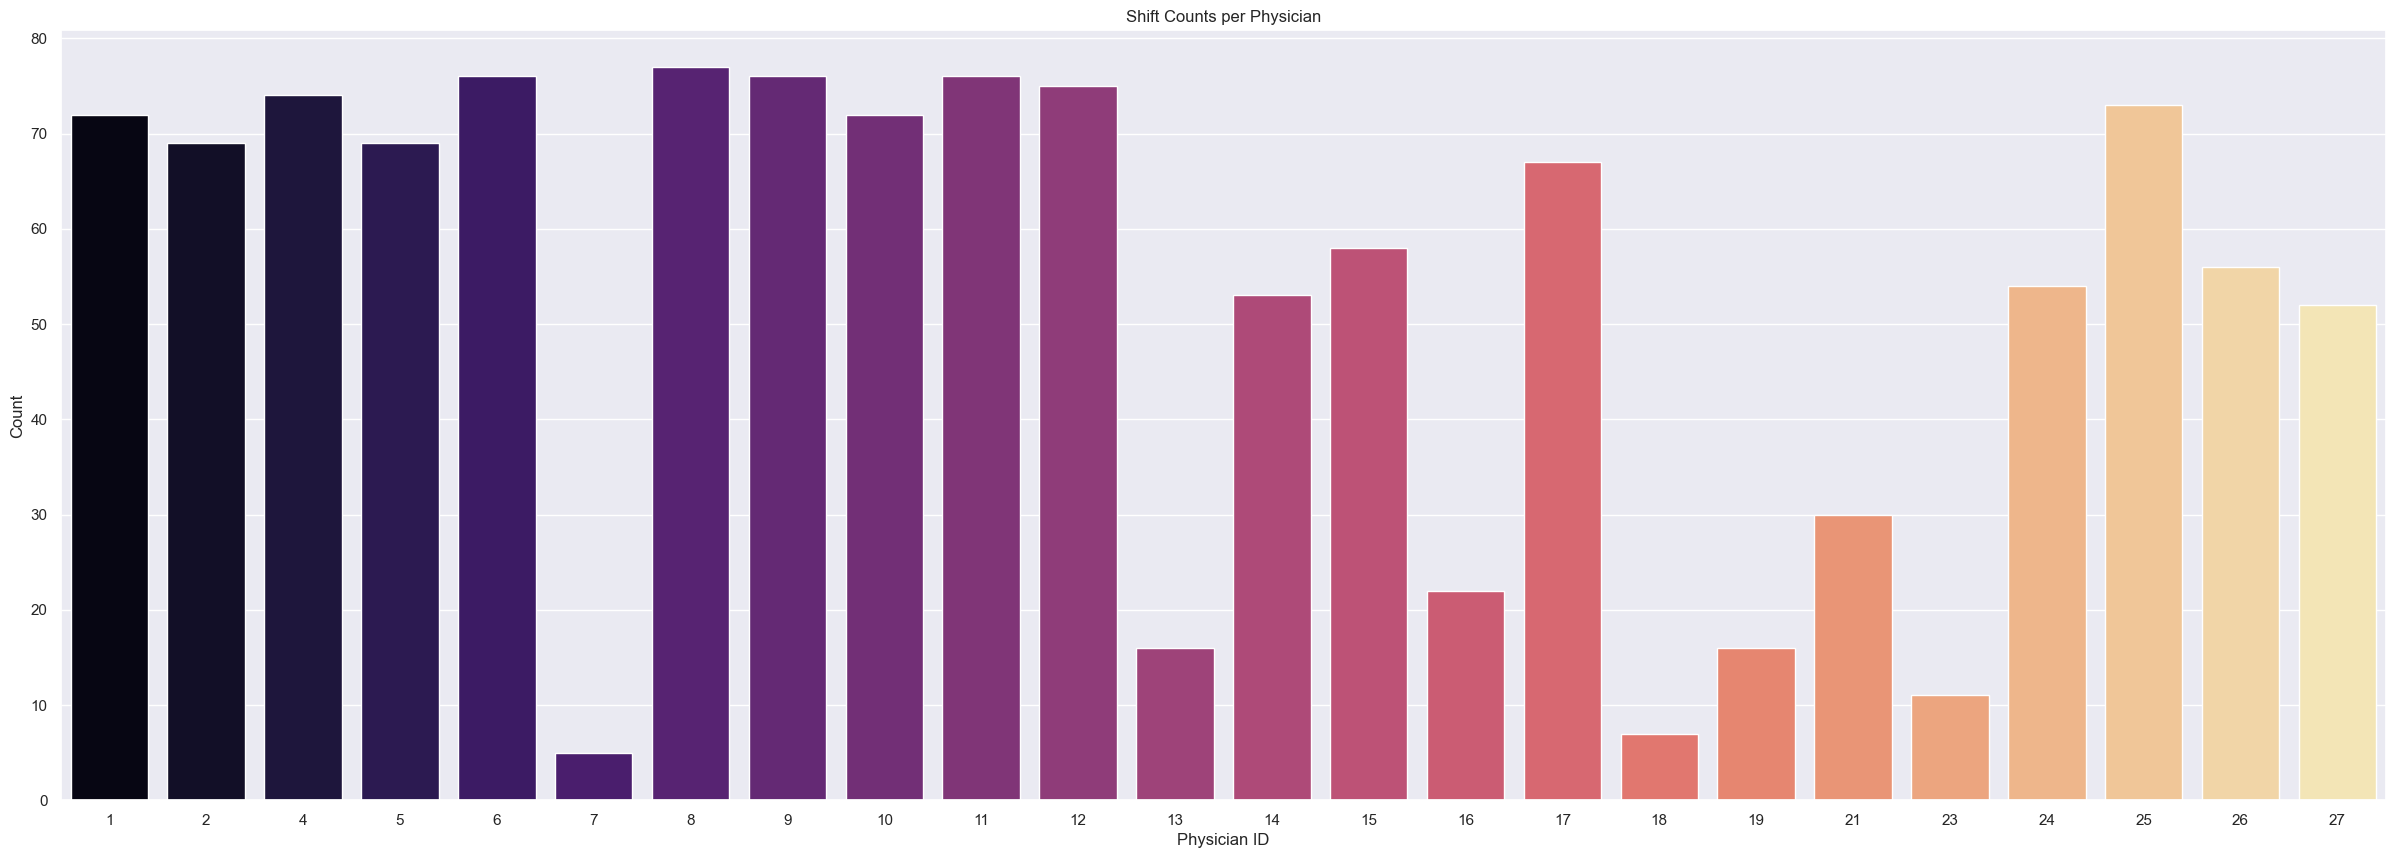

In [44]:
df_subset = df[(df["Year"]==2016) & (df["Month"]>=1) & (df["Month"]<=7)]
shift_counts = df_subset.groupby(' Physician ID').size().reset_index(name='Count')

plt.figure(figsize=(30,10))
sns.barplot(data=shift_counts, x=' Physician ID', y='Count', palette="magma")
plt.title('Shift Counts per Physician')
plt.xlabel('Physician ID')
plt.ylabel('Count')
plt.show()

Average ED Volume per Physician for a given shift

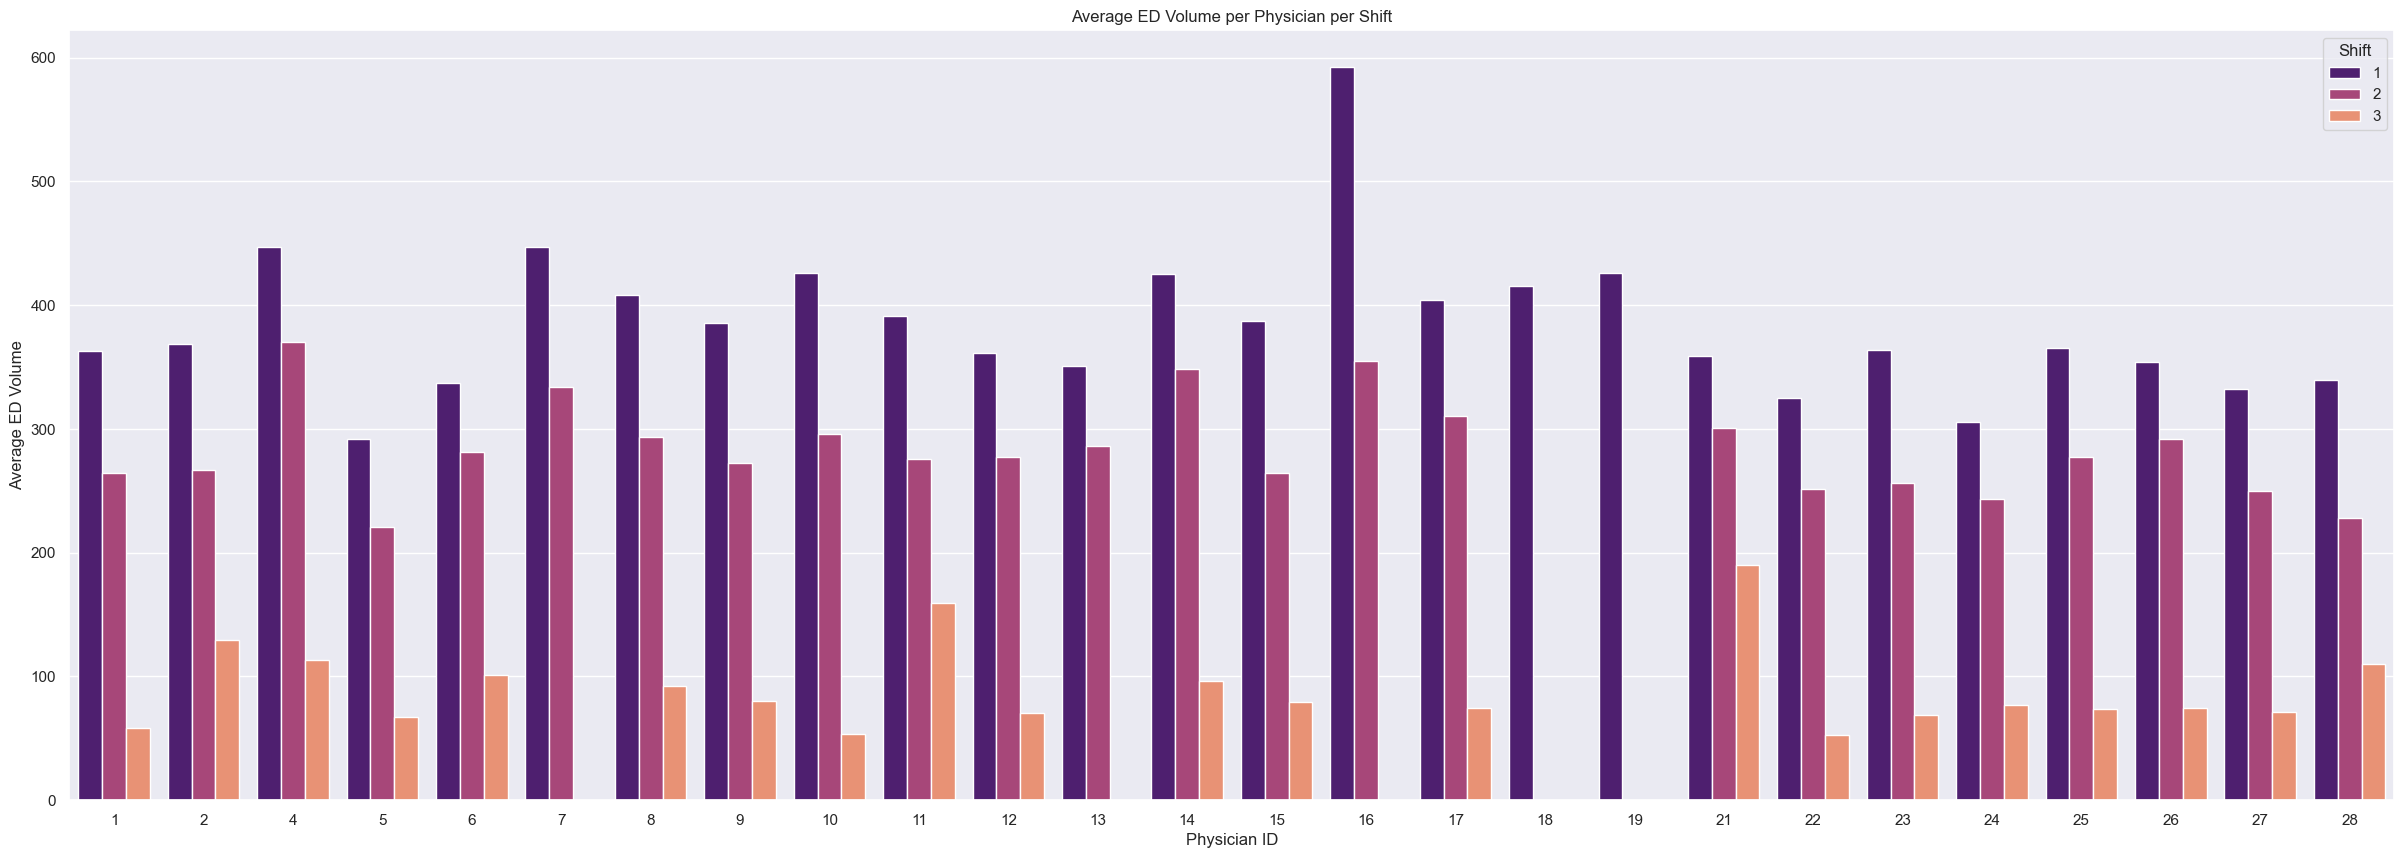

In [45]:
avg_ed_volume_shift = df.groupby([' Physician ID', 'Shift'])['ED Volume'].mean().reset_index()

# Plot the bar graph using seaborn
plt.figure(figsize=(30,10))
sns.barplot(data=avg_ed_volume_shift, x=' Physician ID', y='ED Volume', hue='Shift', palette='magma')
plt.title('Average ED Volume per Physician per Shift')
plt.xlabel('Physician ID')
plt.ylabel('Average ED Volume')
plt.legend(title='Shift', loc='upper right')
plt.show()

In [46]:
avg_ed_volume_shift = avg_ed_volume_shift = df.groupby([' Physician ID', 'Shift'])['ED Volume'].mean().reset_index()
avg_ed_volume_shift = avg_ed_volume_shift[avg_ed_volume_shift["Shift"]==1]

extra_docs = pd.DataFrame({
    " Physician ID": [3, 20],
    "Shift": [1,1],
    "ED Volume": [0,0]
})
avg_ed_volume_shift = avg_ed_volume_shift.append(extra_docs).sort_values(" Physician ID")
list_of_capacity = list(avg_ed_volume_shift["ED Volume"])

list_of_capacity

[362.71204188481676,
 368.22222222222223,
 0.0,
 446.94827586206895,
 292.0394088669951,
 336.9267015706806,
 446.9130434782609,
 408.07894736842104,
 385.3030303030303,
 426.13775510204084,
 390.84,
 361.1803278688525,
 350.42105263157896,
 425.030303030303,
 386.90714285714284,
 592.421052631579,
 404.3492063492063,
 415.44444444444446,
 426.0,
 0.0,
 358.90425531914894,
 324.5769230769231,
 363.4761904761905,
 305.5584415584416,
 365.3368983957219,
 353.84276729559747,
 332.0506329113924,
 339.26190476190476]

Average Speed for a given Physician on a given shift

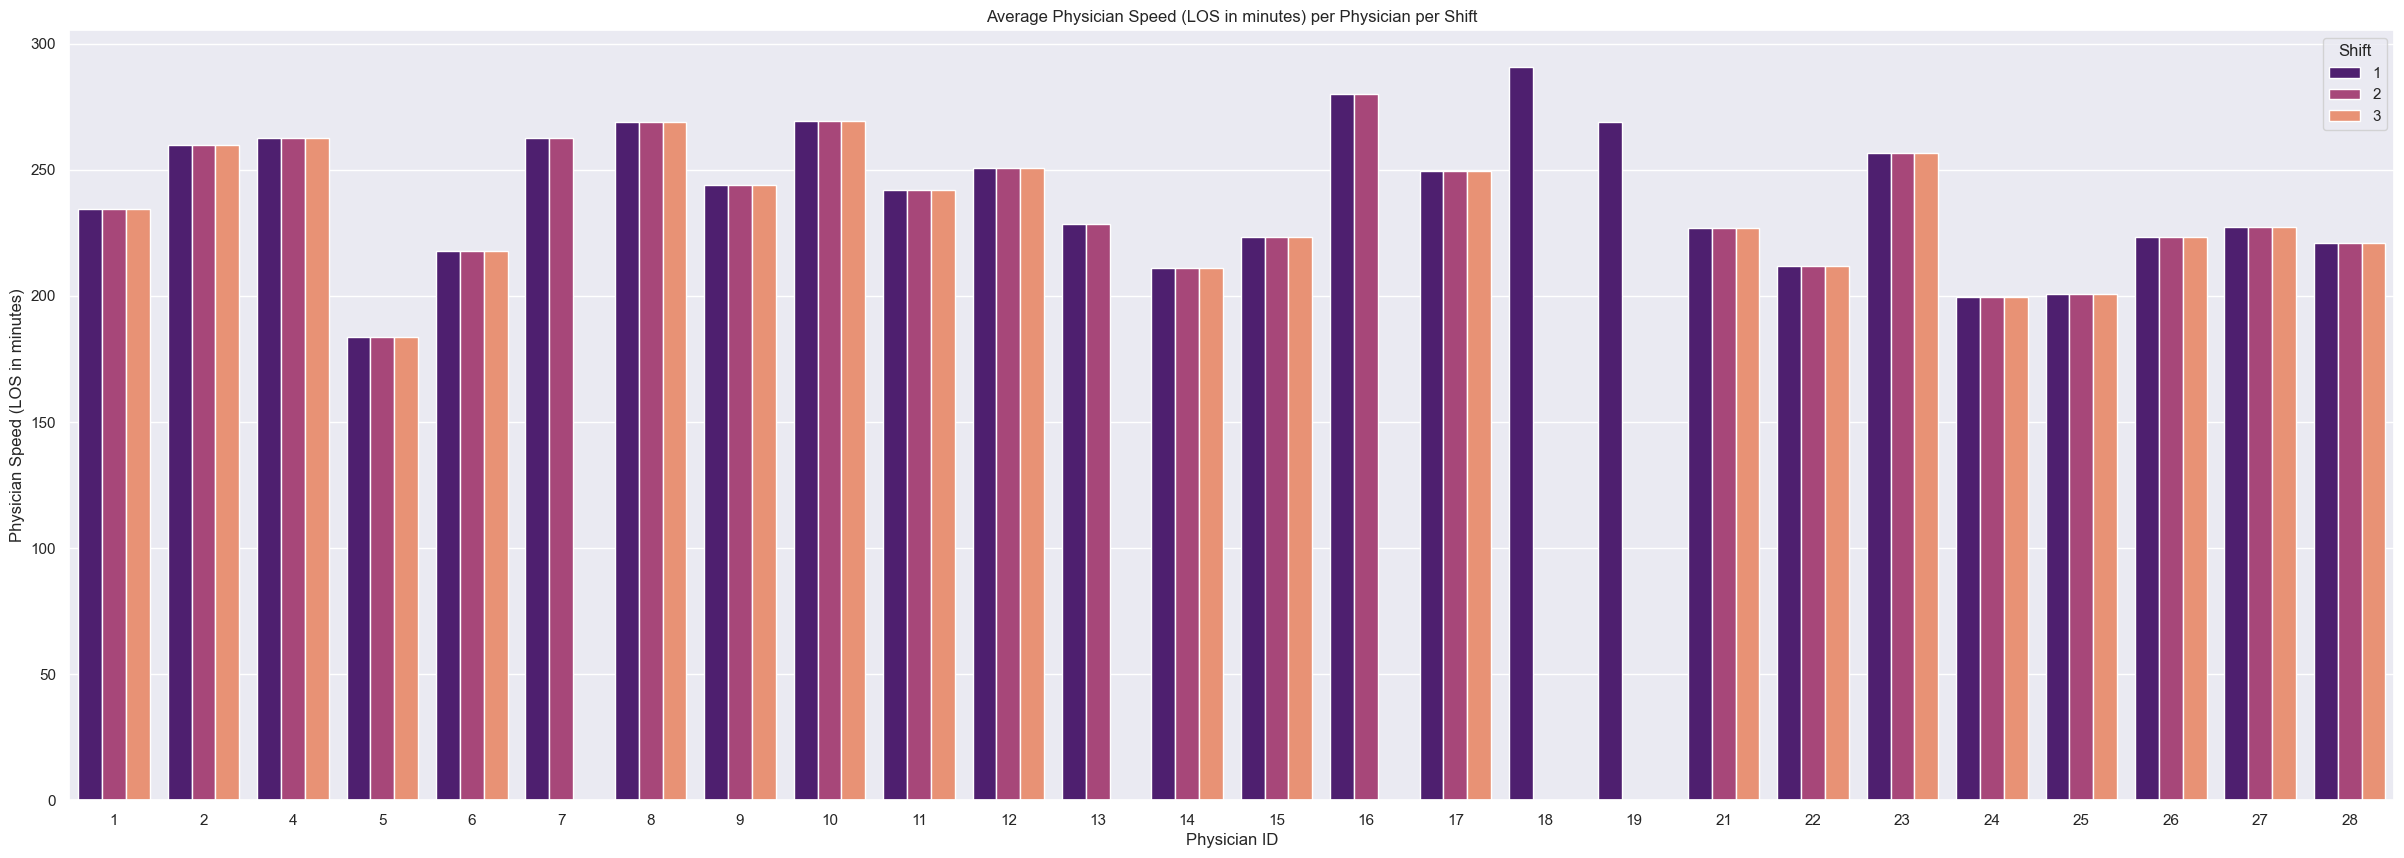

In [47]:
avg_ed_volume_shift = df.groupby([' Physician ID', 'Shift'])['Physician Speed (LOS in minutes)'].mean().reset_index()

# Plot the bar graph using seaborn
plt.figure(figsize=(30,10))
sns.barplot(data=avg_ed_volume_shift, x=' Physician ID', y='Physician Speed (LOS in minutes)', hue='Shift', palette='magma')
plt.title('Average Physician Speed (LOS in minutes) per Physician per Shift')
plt.xlabel('Physician ID')
plt.ylabel('Physician Speed (LOS in minutes)')
plt.legend(title='Shift', loc='upper right')
plt.show()

In [48]:
avg_ed_volume_shift = df.groupby([' Physician ID', 'Shift'])['Physician Speed (LOS in minutes)'].mean().reset_index()
avg_ed_volume_shift = avg_ed_volume_shift[avg_ed_volume_shift["Shift"]==1]

extra_docs = pd.DataFrame({
    " Physician ID": [3, 20],
    "Shift": [1,1],
    "Physician Speed (LOS in minutes)": [999,999]
})
avg_ed_volume_shift = avg_ed_volume_shift.append(extra_docs).sort_values(" Physician ID")
list_of_speeds = list(avg_ed_volume_shift["Physician Speed (LOS in minutes)"])

list_of_speeds



[234.37092731829574,
 259.7377165577961,
 999.0,
 262.5791726105563,
 183.57051460361615,
 217.92519685039372,
 262.6868131868132,
 268.8324258099646,
 243.86320109439126,
 269.22103592555186,
 242.03161460293563,
 250.64790973528133,
 228.53105802047781,
 211.19029374201787,
 223.32002249718786,
 280.048231511254,
 249.26356835906415,
 290.7238095238095,
 268.7877358490566,
 999.0,
 226.9508990318119,
 211.70398277717976,
 256.45701096364684,
 199.46953781512605,
 200.699158174568,
 223.15081339712918,
 227.2958928571429,
 220.85367454068242]

Average Physician Quality for a given Physician on given shift

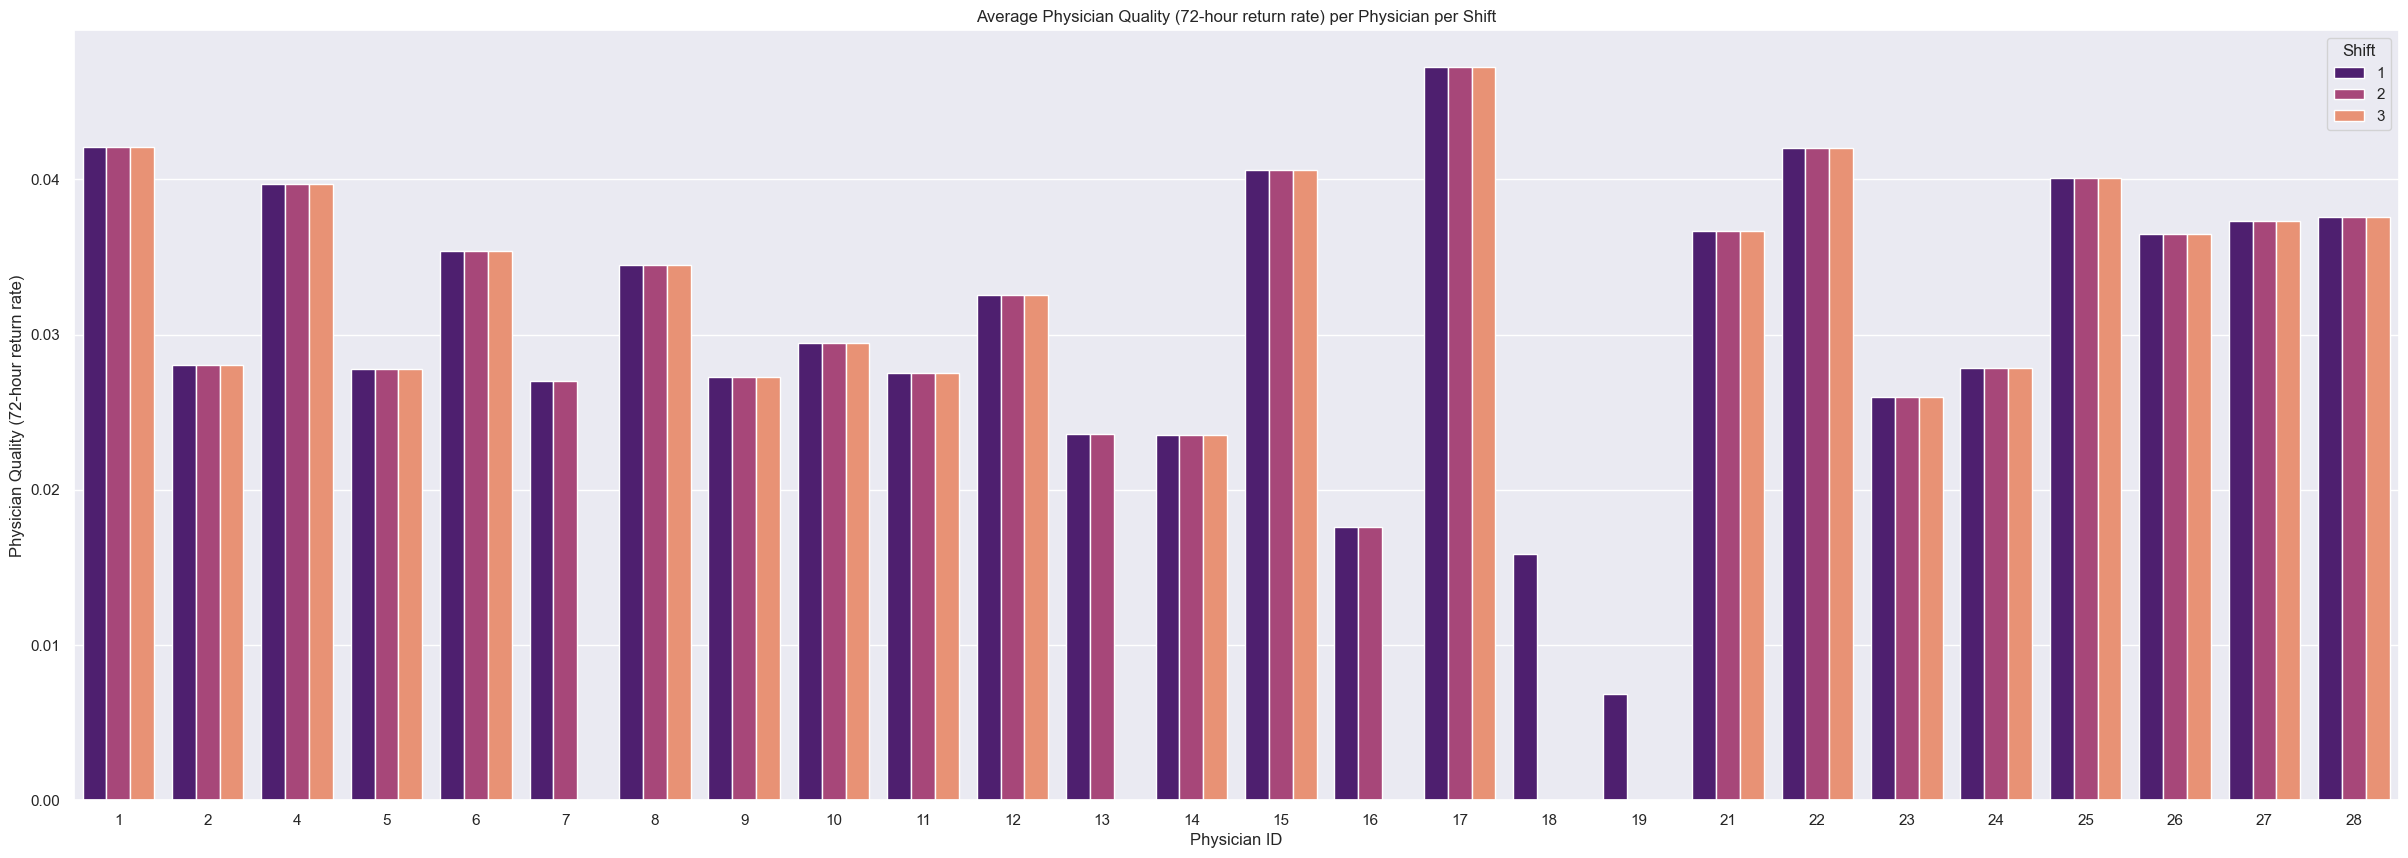

In [49]:
# Group by 'Physician ID' and calculate the mean ED Volume
avg_ed_volume_shift = df.groupby([' Physician ID', 'Shift'])['Physician Quality (72-hour return rate)'].mean().reset_index()

# Plot the bar graph using seaborn
plt.figure(figsize=(30,10))
sns.barplot(data=avg_ed_volume_shift, x=' Physician ID', y='Physician Quality (72-hour return rate)', hue='Shift', palette='magma')
plt.title('Average Physician Quality (72-hour return rate) per Physician per Shift')
plt.xlabel('Physician ID')
plt.ylabel('Physician Quality (72-hour return rate)')
plt.legend(title='Shift', loc='upper right')
plt.show()

In [50]:
avg_ed_volume_shift = df.groupby([' Physician ID', 'Shift'])['Physician Quality (72-hour return rate)'].mean().reset_index()
avg_ed_volume_shift = avg_ed_volume_shift[avg_ed_volume_shift["Shift"]==1]

extra_docs = pd.DataFrame({
    " Physician ID": [3, 20],
    "Shift": [1,1],
    "Physician Quality (72-hour return rate)": [999,999]
})
avg_ed_volume_shift = avg_ed_volume_shift.append(extra_docs).sort_values(" Physician ID")
list_of_quality = list(avg_ed_volume_shift["Physician Quality (72-hour return rate)"])

list_of_quality

[0.04211162603264154,
 0.028020623178659495,
 999.0,
 0.03969957081545064,
 0.02779937791601866,
 0.03539292141571686,
 0.027027027027027032,
 0.0344896731501905,
 0.027281063732232918,
 0.029454722492697177,
 0.02750146284376829,
 0.032562125107112254,
 0.023575638506876228,
 0.023508137432188065,
 0.04063745019920319,
 0.01762114537444934,
 0.04724880382775119,
 0.015873015873015872,
 0.00684931506849315,
 999.0,
 0.036702127659574466,
 0.04199475065616798,
 0.02601156069364162,
 0.02787286063569682,
 0.040104053761109905,
 0.03651354534746761,
 0.03734827264239029,
 0.03755868544600939]

Average ESI Per Shift

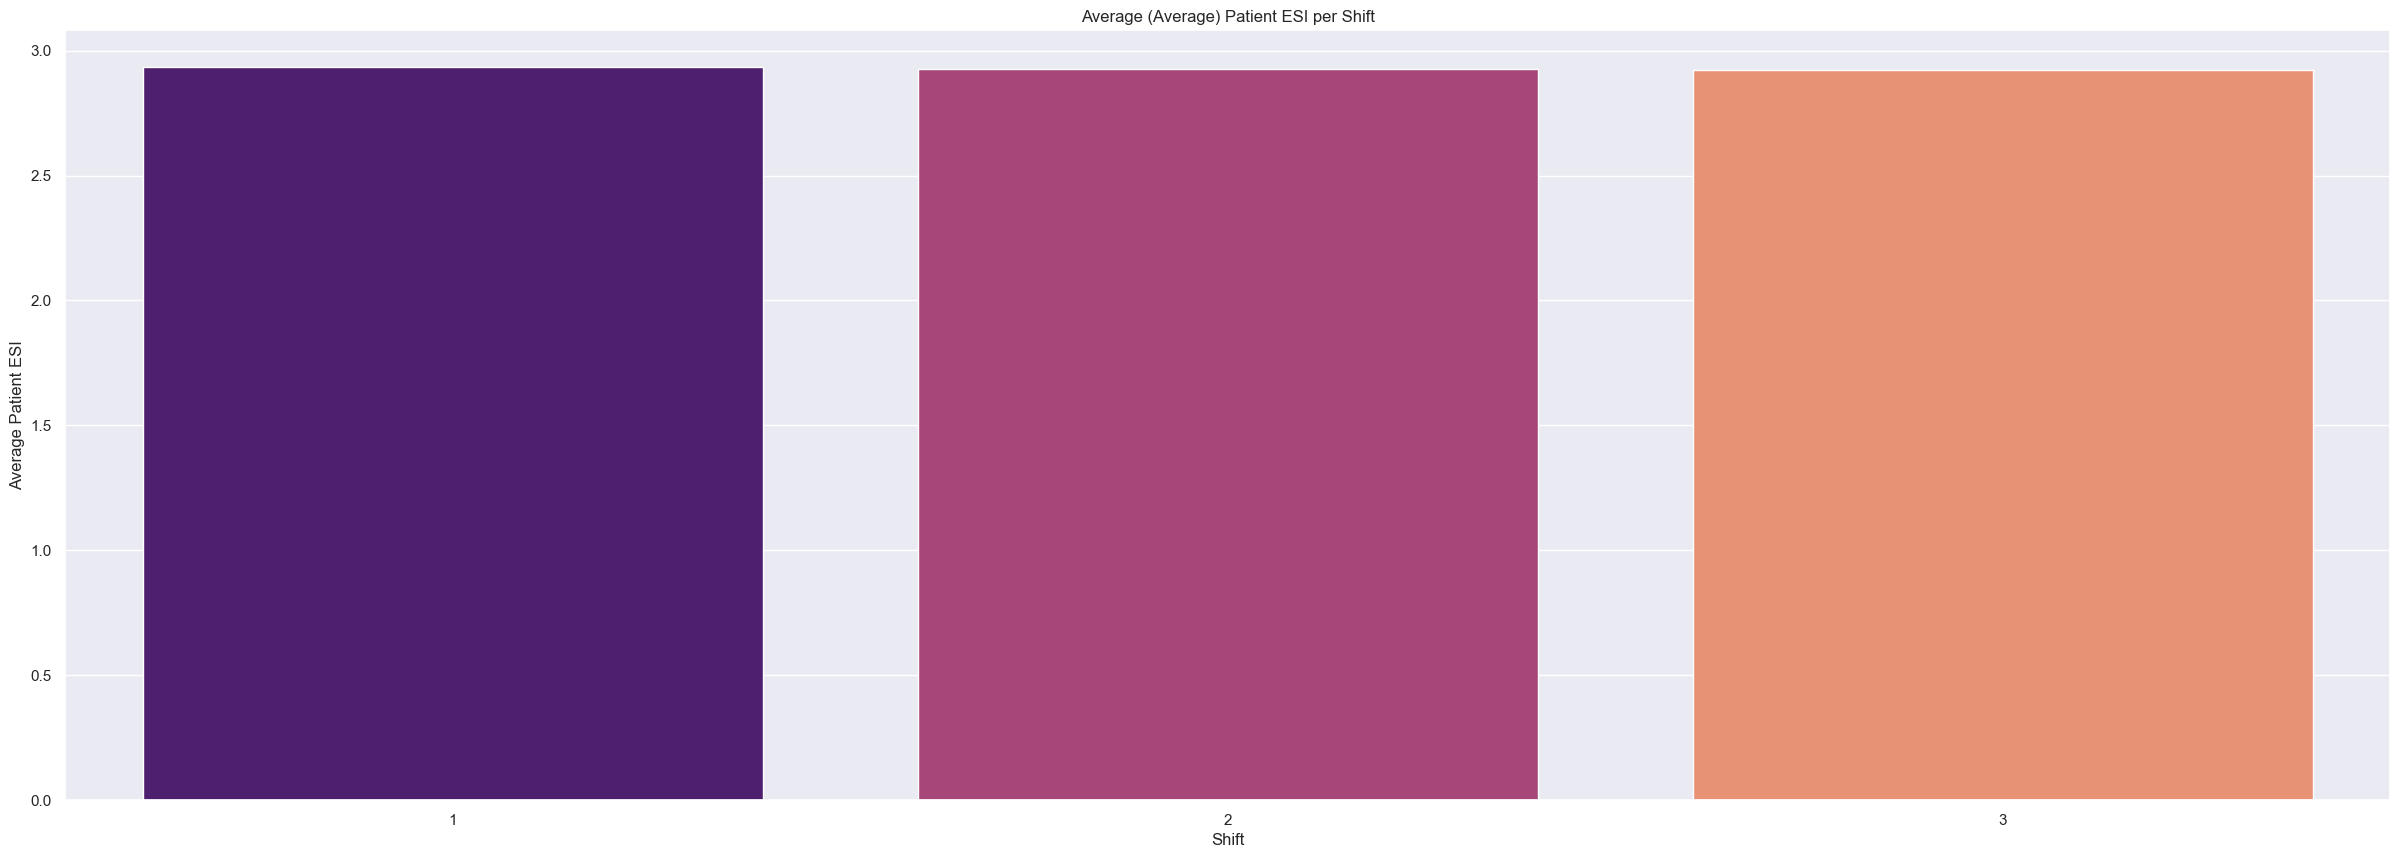

In [51]:
avg_ed_volume_shift = df.groupby('Shift')['Average Patient ESI'].mean().reset_index()

# Plot the bar graph using seaborn
plt.figure(figsize=(30,10))
sns.barplot(data=avg_ed_volume_shift, x='Shift', y='Average Patient ESI', palette='magma')
plt.title('Average (Average) Patient ESI per Shift')
plt.xlabel('Shift')
plt.ylabel('Average Patient ESI')
plt.show()